In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
!pip install hottbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 2.7 MB/s eta 0:00:00


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from hottbox.core import Tensor

[Return to Table of Contents](./0_Table_of_contents.ipynb)

# Tensors and basic operations

<img src="https://github.com/btarifi10/dpm-coursework/blob/master/notebooks/imgs/tensors_dogs.jpg?raw=1" alt="Drawing" style="width: 500px;"/>

A tensor is a multi-dimenaional array of data where each dimension is conventionally referred to as the **mode**. Tensor order is defined by the number of its modes which is equivivalent to the number of indices required to identify a particular entry of a multi-dimensional array. For ease of visualisation and compact notation, we consider a third order tensor $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$. Thus, an element of such a tensor, $\mathbf{\underline{X}} \in \mathbb{R}^{I \times J \times K}$, can be written in a general form as:

$$ x_{ijk} = \mathbf{\underline{X}}[i, j, k]$$

> **Note:** In order to be consistent with Python indexing, count of modes and elements within starts from zeros.

Creation of a tensor starts with a formation of a multidimensional array of data.

In [6]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)
tensor.data

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## **Assigment 1**

1. Create a tensor of order 5 (of any shape) and with all its values equal to 5. Then, calculate its Frobenious norm.
2. Construct several tensors of orders varying from 3 to 20, with the size of each dimension equal to 2. Plot the relation between an order of a tensor and the number of its elements.
3. Construct several tensors of order 3 with the size of each dimension varying from 3 to 15. Plot the relation between the size of dimensions of a tensor and the number of its elements.
4. Analyse and compare the so obtained graphs.

### Solution: Part 1

In [10]:
# Create a tensor
array_3d = (5*np.ones((336, 1))).reshape((2, 4, 3, 7, 2))

# Create tensor
tensor = Tensor(array_3d)

# Result preview
print(tensor)

This tensor is of order 5 and consists of 336 elements.
Sizes and names of its modes are (2, 4, 3, 7, 2) and ['mode-0', 'mode-1', 'mode-2', 'mode-3', 'mode-4'] respectively.


In [29]:
# Calculate Frobenious norm
shape = tensor.shape

frobenius_norm = (np.sum(np.power(np.abs(tensor.data.flatten()), 2)))**(1/2)
print(f'The frobenius norm for the tensor is {frobenius_norm}')


The frobenius norm for the tensor is 91.6515138991168


### Solution: Part 2

In [31]:
# Create tensors and collect information
orders = range(3, 21)

numels = []
for i, order in enumerate(orders):
  t = Tensor(np.ones((2**order)).reshape(order*(2,)))
  numels.append(t.size)

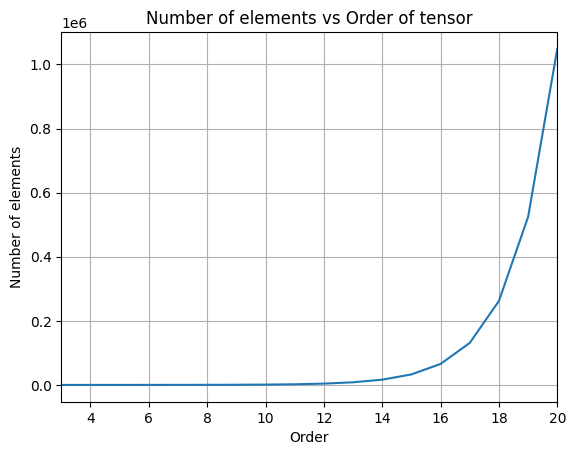

In [34]:
# Plot results
plt.plot(orders, numels)
plt.grid()
plt.xlabel("Order")
plt.ylabel("Number of elements")
plt.xlim([3, 20])
plt.title("Number of elements vs Order of tensor (dimensions=2)")
plt.show()

### Solution: Part 3

In [36]:
# Create tensors and collect information
sizes = range(3, 16)

numels = []
for i, s in enumerate(sizes):
  t = Tensor(np.ones((s**3)).reshape(3*(s,)))
  numels.append(t.size)

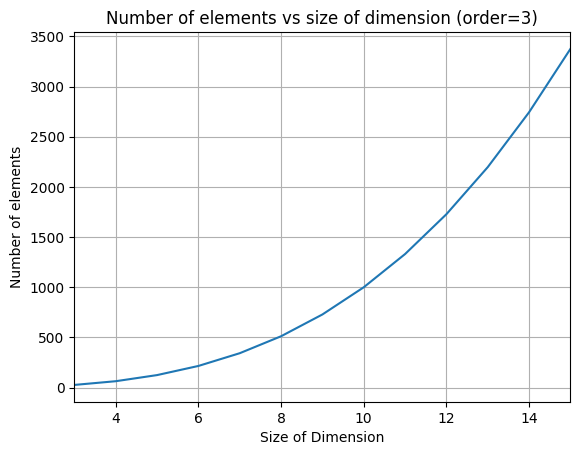

In [37]:
# Plot results
plt.plot(sizes, numels)
plt.grid()
plt.xlabel("Size of Dimension")
plt.ylabel("Number of elements")
plt.xlim([3, 15])
plt.title("Number of elements vs size of dimension (order=3)")
plt.show()

### Solution: Part 4


The above graphs illustrate the difference between increasing the dimensions of a tensor versus increasing the order. With the order-3 tensor, increasing the number of dimensions has a polynomial trend -- the number of elemenmts is function of $d^3$ where $d$ is the size of the dimension. However, increasing the order has a much more drastic effect and follows an exponential increase in number of elements. This makes high order tensors computationally expensive but usually quite sparse due to the massive space of elements.



# Most common tensor substructures
<img src="https://github.com/btarifi10/dpm-coursework/blob/master/notebooks/imgs/tensor_substructures.png?raw=1" alt="Drawing" style="width: 500px;"/>

1. A **fiber** is a vector obtained by fixing all but one of the indices, e.g.  $\mathbf{\underline{X}}[i,:,k]$ is the mode-2 fiber $\mathbf{\underline{X}}$ (usually refered to as row fiber).

1. Fixing all but two of the indices yields a matrix called a **slice** of a tensor, e.g. $\mathbf{\underline{X}}[:,:,k]$ is the mode-[1,2] slice (usually refered to as the frontal slice).

**Note:** The same principles and definitions can be applied to a tensor of an arbitrarily large order. In addition, you can obtain a **subtensor** by fixing at least three indices and letting the remaining ones vary.

In [38]:
# Mode-2 fiber
tensor.data[0,1,:]

array([[[5., 5.],
        [5., 5.],
        [5., 5.],
        [5., 5.],
        [5., 5.],
        [5., 5.],
        [5., 5.]],

       [[5., 5.],
        [5., 5.],
        [5., 5.],
        [5., 5.],
        [5., 5.],
        [5., 5.],
        [5., 5.]],

       [[5., 5.],
        [5., 5.],
        [5., 5.],
        [5., 5.],
        [5., 5.],
        [5., 5.],
        [5., 5.]]])

In [39]:
# Frontal slice
tensor.data[0,:,:]

array([[[[5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.]],

        [[5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.]],

        [[5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.]]],


       [[[5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.]],

        [[5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.]],

        [[5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.]]],


       [[[5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.],
         [5., 5.]],

        [[5., 5.],
         [5., 5.],
         [5.,

## **Assigment 2**

1. Create a tensor of order 4 which consists of 81 elements and display all its horizontal slices and any five row fibers.
2. Create a tensor of order 3 and shape `(4,2,5)`, where the values of each consequent frontal slice are doubled.

### Solution: Part 1

In [54]:
# Create a tensor of order 4
tensor = Tensor(np.random.randint(1, 10, size=(3**4,1)).reshape(4*(3,)))
print(tensor)

This tensor is of order 4 and consists of 81 elements.
Sizes and names of its modes are (3, 3, 3, 3) and ['mode-0', 'mode-1', 'mode-2', 'mode-3'] respectively.


In [55]:
# Display slices
print("Horizontal slices:")
for i in range(0, 3):
  for l in range(0, 3):
    print(tensor.data[i, :, :, l])

Horizontal slices:
[[4 6 2]
 [1 8 5]
 [9 1 4]]
[[3 7 8]
 [8 2 5]
 [4 8 1]]
[[2 1 9]
 [4 5 3]
 [3 7 6]]
[[8 4 9]
 [4 1 2]
 [1 2 8]]
[[2 9 9]
 [3 5 4]
 [3 6 3]]
[[4 7 3]
 [9 1 4]
 [3 6 6]]
[[5 4 2]
 [2 3 9]
 [7 2 4]]
[[7 5 7]
 [4 3 8]
 [4 4 2]]
[[7 3 3]
 [3 3 1]
 [2 6 8]]


In [56]:
# Display fibers
print("Fibers:")
print(tensor.data[0, :, 0, 0])
print(tensor.data[1, :, 0, 1])
print(tensor.data[0, :, 1, 0])
print(tensor.data[2, :, 1, 2])
print(tensor.data[2, :, 2, 2])

Fibers:
[4 1 9]
[2 3 3]
[6 8 1]
[3 3 6]
[3 1 8]


### Solution: Part 2

In [66]:
# Create a tensor of order 3
tensor = Tensor(np.random.randint(1, 10, size=(4*2*5,1)).reshape((4, 2, 5)))
print(tensor)

for k in range(1, 5):
  tensor[:, :, k] = 2*tensor[:, :, k-1]

for k in range(0, 5):
  print(tensor[:, :, k])

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (4, 2, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.
[[1 3]
 [7 5]
 [8 6]
 [5 2]]
[[ 2  6]
 [14 10]
 [16 12]
 [10  4]]
[[ 4 12]
 [28 20]
 [32 24]
 [20  8]]
[[ 8 24]
 [56 40]
 [64 48]
 [40 16]]
[[ 16  48]
 [112  80]
 [128  96]
 [ 80  32]]


# Unfolding

Conventionally, unfolding is considered to be a process of element mapping from a tensor to a matrix. In other words, it arranges the mode-$n$ fibers of a tensor to be the matrix columns. Thus, the mode-$n$ unfolding is denoted as:

$$\mathbf{\underline{A}} \xrightarrow{n} \mathbf{A}_{(n)}$$

Thus, this operations requires to specify a mode along which a tensor will be unfolded. For a third order tensor, a visual representation of such operation is as following

<img src="https://github.com/btarifi10/dpm-coursework/blob/master/notebooks/imgs/unfolding.png?raw=1" alt="Drawing" style="width: 600px;"/>

In `hottbox` this functionality is available through the corresponding methods of the `Tensor` object, for instance:

In [75]:
# Create 3-d array of data
array_3d = np.arange(24).reshape((2, 3, 4))

# Create tensor
tensor = Tensor(array_3d)

# Unfolding of a tensor
tensor.unfold(mode=0)

# Result preview
print(tensor)
tensor.data

This tensor is of order 2 and consists of 24 elements.
Sizes and names of its modes are (2, 12) and ['mode-0', 'mode-1_mode-2'] respectively.


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

## **Assigment 3**

1. Create a tensor, $\mathbf{\underline{A}}$, of order 4, in such a way that its version unfolded along the second mode would have sizes `(5,72)`, that is $\mathbf{A}_{(n)} \in  \mathbb{R}^{5 \times 72}$. Validate your results by displaying the unfolded tensor.

### Solution : Part 1

In [73]:
# Create a tensor
array = np.arange(360).reshape((3, 5, 4, 6))

# Create tensor
tensor = Tensor(array)

tensor.unfold(mode=1) # assuming second mode is mode-1 since first mode is mode-0

This tensor is of order 2 and consists of 360 elements.
Sizes and names of its modes are (5, 72) and ['mode-1', 'mode-0_mode-2_mode-3'] respectively.


array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23, 120, 121,
        122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
        135, 136, 137, 138, 139, 140, 141, 142, 143, 240, 241, 242, 243,
        244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
        257, 258, 259, 260, 261, 262, 263],
       [ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
         37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
        159, 160, 161, 162, 163, 164, 165, 166, 167, 264, 265, 266, 267,
        268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
        281, 282, 283, 284, 285, 286, 287],
       [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
         61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71, 168, 169,
        170, 171, 172, 173, 174, 175

In [74]:
# Display unfolded version
print(tensor)
tensor.data

This tensor is of order 2 and consists of 360 elements.
Sizes and names of its modes are (5, 72) and ['mode-1', 'mode-0_mode-2_mode-3'] respectively.


array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23, 120, 121,
        122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
        135, 136, 137, 138, 139, 140, 141, 142, 143, 240, 241, 242, 243,
        244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
        257, 258, 259, 260, 261, 262, 263],
       [ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
         37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47, 144, 145,
        146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
        159, 160, 161, 162, 163, 164, 165, 166, 167, 264, 265, 266, 267,
        268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280,
        281, 282, 283, 284, 285, 286, 287],
       [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
         61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71, 168, 169,
        170, 171, 172, 173, 174, 175

# Mode-n product
<img src="https://github.com/btarifi10/dpm-coursework/blob/master/notebooks/imgs/mode_n_product.png?raw=1" alt="Drawing" style="width: 600px;"/>

The mode-$n$ product is a multiplication of a tensor  by a matrix along the $n^{th}$ mode of a tensor. This essentially means that each mode-$n$ fiber should be multiplied by this matrix. Mathematically, this can be expressed as:

$$\mathbf{\underline{X}} \times_n \mathbf{A} = \mathbf{\underline{Y}} \quad \Leftrightarrow  \quad \mathbf{Y}_{(n)} = \mathbf{A} \mathbf{X}_{(n)}  $$

In [76]:
I, J, K = 2, 3, 4
J_new = 5

# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

# Create matrix
A = np.arange(J_new * J).reshape(J_new, J)

# Performs Mode-n product
Y = X.mode_n_product(A, mode=1, inplace=False)

# Preview of resulting tensor
print(Y)

# Preview of its unfolded version
Y.unfold(mode=1, inplace=False).data

This tensor is of order 3 and consists of 40 elements.
Sizes and names of its modes are (2, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


array([[ 20,  23,  26,  29,  56,  59,  62,  65],
       [ 56,  68,  80,  92, 200, 212, 224, 236],
       [ 92, 113, 134, 155, 344, 365, 386, 407],
       [128, 158, 188, 218, 488, 518, 548, 578],
       [164, 203, 242, 281, 632, 671, 710, 749]])

## **Assignment 4**

1. Perform the mode-$n$ product of a 3-rd order tensor, $\mathbf{\underline{X}}$, with a matrix, $\mathbf{A} \in  \mathbb{R}^{5 \times 4}$, provided that the resulting tensor, $\mathbf{\underline{Y}}$, consists of `100` elements. Validate your results.

> **Note:** You are encouraged to experiment with the optional parameter `inplace` and to investigate its effect on the result.

### Solution: Part 1

In [87]:
I, J, K = 4, 5, 4


# Create tensor
array_3d = np.arange(I * J * K).reshape(I, J ,K)
X = Tensor(array_3d)

print(X)

This tensor is of order 3 and consists of 80 elements.
Sizes and names of its modes are (4, 5, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [88]:
# Create matrix
K_new = 5
A = np.arange(K_new * K).reshape(K_new, K)

print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]]


In [89]:
# Perform mode-n product
Y = X.mode_n_product(A, mode=2, inplace=False)

# Preview of resulting tensor
print(Y)

This tensor is of order 3 and consists of 100 elements.
Sizes and names of its modes are (4, 5, 5) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [90]:
# Validate equivalence between the left and right hand side
Y.unfold(mode=1, inplace=False).data

array([[  14,   38,   62,   86,  110,  134,  478,  822, 1166, 1510,  254,
         918, 1582, 2246, 2910,  374, 1358, 2342, 3326, 4310],
       [  38,  126,  214,  302,  390,  158,  566,  974, 1382, 1790,  278,
        1006, 1734, 2462, 3190,  398, 1446, 2494, 3542, 4590],
       [  62,  214,  366,  518,  670,  182,  654, 1126, 1598, 2070,  302,
        1094, 1886, 2678, 3470,  422, 1534, 2646, 3758, 4870],
       [  86,  302,  518,  734,  950,  206,  742, 1278, 1814, 2350,  326,
        1182, 2038, 2894, 3750,  446, 1622, 2798, 3974, 5150],
       [ 110,  390,  670,  950, 1230,  230,  830, 1430, 2030, 2630,  350,
        1270, 2190, 3110, 4030,  470, 1710, 2950, 4190, 5430]])

In [91]:
X.mode_n_product(A, mode=2, inplace=True)

X.unfold(mode=1, inplace=False).data

array([[  14,   38,   62,   86,  110,  134,  478,  822, 1166, 1510,  254,
         918, 1582, 2246, 2910,  374, 1358, 2342, 3326, 4310],
       [  38,  126,  214,  302,  390,  158,  566,  974, 1382, 1790,  278,
        1006, 1734, 2462, 3190,  398, 1446, 2494, 3542, 4590],
       [  62,  214,  366,  518,  670,  182,  654, 1126, 1598, 2070,  302,
        1094, 1886, 2678, 3470,  422, 1534, 2646, 3758, 4870],
       [  86,  302,  518,  734,  950,  206,  742, 1278, 1814, 2350,  326,
        1182, 2038, 2894, 3750,  446, 1622, 2798, 3974, 5150],
       [ 110,  390,  670,  950, 1230,  230,  830, 1430, 2030, 2630,  350,
        1270, 2190, 3110, 4030,  470, 1710, 2950, 4190, 5430]])

# Properties of mode-n product

1. For distinct modes in a series of multiplications, the order of the multiplication is irrelevent:

  $$ \mathbf{\underline{X}} \times_n \mathbf{A} \times_m \mathbf{B} = \mathbf{\underline{X}} \times_m \mathbf{B} \times_n \mathbf{A} \quad (m \neq n) $$

1. However, this does not hold if the modes are the same :

  $$ \mathbf{\underline{X}} \times_n \mathbf{A} \times_n \mathbf{B} = \mathbf{\underline{X}} \times_n (\mathbf{B}\mathbf{A}) $$

## **Assignment 5**

1. Validate both of the above properties empirically
2. Prove the second property analytically

> **Note:** Be aware of consequences of the optional parameter `inplace` (its default value is set to `True`).

### Solution: Part 1

In [95]:
# Create tensor
X = Tensor(np.arange(24).reshape((2, 3, 4)))
print(X)

This tensor is of order 3 and consists of 24 elements.
Sizes and names of its modes are (2, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.


In [100]:
# Create matrices
A = np.arange(10).reshape(5, 2)
B1 = np.arange(12).reshape(4, 3)
B2 = np.arange(15).reshape(3, 5)

In [101]:
# Validate property 1
Y1 = X.mode_n_product(A, mode=0, inplace=False) # Different modes
Y1 = Y1.mode_n_product(B1, mode=1, inplace=False)
Y2 = X.mode_n_product(B1, mode=1, inplace=False)
Y2 = Y2.mode_n_product(A, mode=0, inplace=False)
# Display results
print(Y1)
print(Y1.data)
print(Y2)
print(Y2.data)

This tensor is of order 3 and consists of 80 elements.
Sizes and names of its modes are (5, 4, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.
[[[  56   59   62   65]
  [ 200  212  224  236]
  [ 344  365  386  407]
  [ 488  518  548  578]]

 [[ 208  223  238  253]
  [ 712  772  832  892]
  [1216 1321 1426 1531]
  [1720 1870 2020 2170]]

 [[ 360  387  414  441]
  [1224 1332 1440 1548]
  [2088 2277 2466 2655]
  [2952 3222 3492 3762]]

 [[ 512  551  590  629]
  [1736 1892 2048 2204]
  [2960 3233 3506 3779]
  [4184 4574 4964 5354]]

 [[ 664  715  766  817]
  [2248 2452 2656 2860]
  [3832 4189 4546 4903]
  [5416 5926 6436 6946]]]
This tensor is of order 3 and consists of 80 elements.
Sizes and names of its modes are (5, 4, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.
[[[  56   59   62   65]
  [ 200  212  224  236]
  [ 344  365  386  407]
  [ 488  518  548  578]]

 [[ 208  223  238  253]
  [ 712  772  832  892]
  [1216 1321 1426 1531]
  [1720 1870 2020 2170]]

 [[ 360  387  414  4

In [102]:
# Validate property 2
Y3 = X.mode_n_product(A, mode=0, inplace=False) # Different modes
Y3 = Y3.mode_n_product(B2, mode=0, inplace=False)
Y4 = X.mode_n_product(np.matmul(B2,A), mode=0, inplace=False)
# Display results
print(Y3)
print(Y3.data)
print(Y4)
print(Y4.data)

This tensor is of order 3 and consists of 36 elements.
Sizes and names of its modes are (3, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.
[[[  840   970  1100  1230]
  [ 1360  1490  1620  1750]
  [ 1880  2010  2140  2270]]

 [[ 2340  2695  3050  3405]
  [ 3760  4115  4470  4825]
  [ 5180  5535  5890  6245]]

 [[ 3840  4420  5000  5580]
  [ 6160  6740  7320  7900]
  [ 8480  9060  9640 10220]]]
This tensor is of order 3 and consists of 36 elements.
Sizes and names of its modes are (3, 3, 4) and ['mode-0', 'mode-1', 'mode-2'] respectively.
[[[  840   970  1100  1230]
  [ 1360  1490  1620  1750]
  [ 1880  2010  2140  2270]]

 [[ 2340  2695  3050  3405]
  [ 3760  4115  4470  4825]
  [ 5180  5535  5890  6245]]

 [[ 3840  4420  5000  5580]
  [ 6160  6740  7320  7900]
  [ 8480  9060  9640 10220]]]


### Solution: Part 2

Use [LaTeX syntax](https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook) for analytical deriviations for the second property below.


In [105]:
%%latex

Given a tensor $\mathbf{\underline{X}}$ with dimensions $d_{1} \times d_{2} \times \ldots \times d_{N}$
and matrices $\mathbf{A}$ of size $m \times k$ and $\mathbf{B}$ of size $p \times m$,
mode-n multiplications $\mathbf{\underline{X}} \times_{n} \mathbf{A} \times_{n} \mathbf{B}$
require $d_{n} = k$. This results in mode-n fibers first in dimension $m$ then $p$,
given $\mathbf{B}$'s compatibility in dimension $m$. The sequence
$\mathbf{\underline{X}} \times_{n} \mathbf{B} \times_{n} \mathbf{A}$ is not feasible
due to dimension inconsistency, demonstrating non-commutativity when the same mode is involved.

For mode-n multiplication seen as linear transformations on mode-n fibers, the operations
equate to a single mode-n multiplication by $\mathbf{B}\mathbf{A}$:

For a mode-n fiber $\mathbf{x}_{d_{n}}$, the operations are:
$$ \mathbf{x}_{m} = \mathbf{A}\mathbf{x}_{d_{n}} $$
$$ \mathbf{x}_{p} = \mathbf{B}\mathbf{x}_{m} = \mathbf{B}(\mathbf{A}\mathbf{x}_{d_{n}}) = (\mathbf{B}\mathbf{A})\mathbf{x}_{d_{n}} $$

Hence, $\mathbf{\underline{X}} \times_{n} (\mathbf{B}\mathbf{A})$ describes the transformation
 of mode-n fibers by $\mathbf{B}\mathbf{A}$.


<IPython.core.display.Latex object>